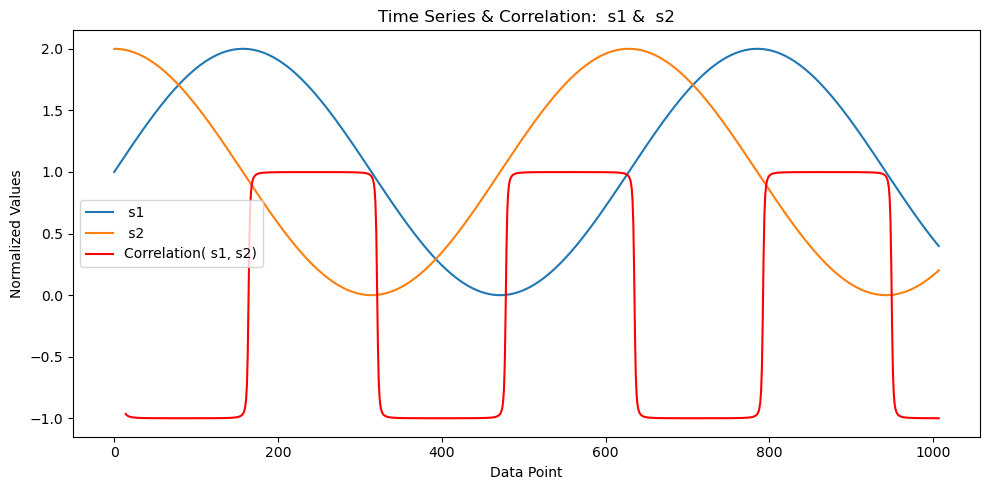

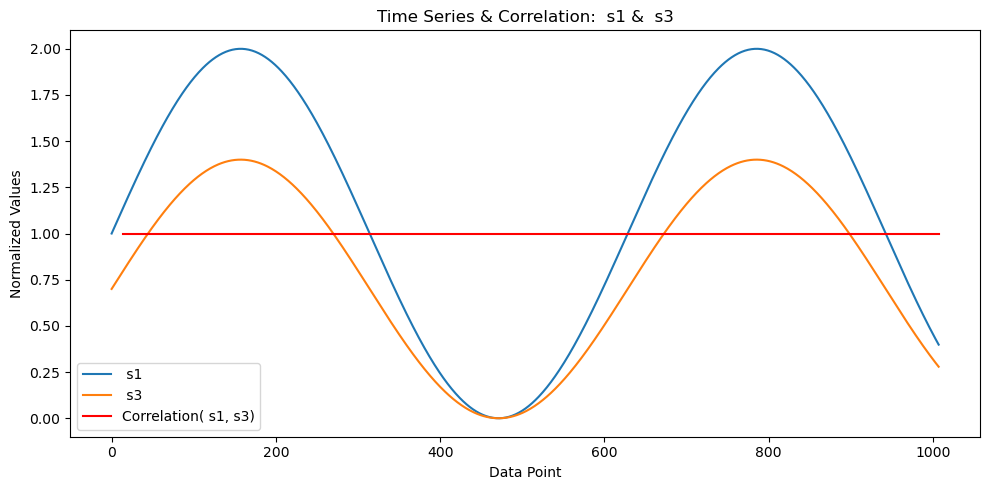

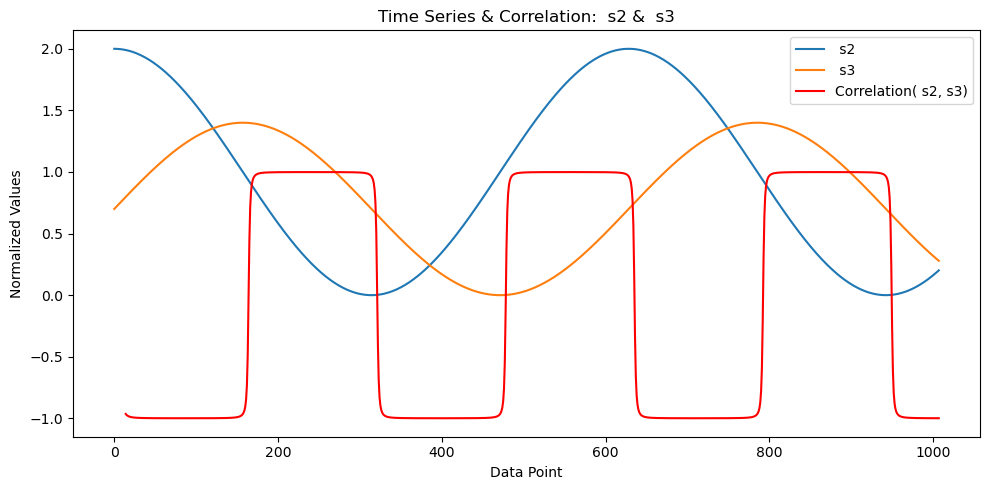

Saved: complex_formatted.csv


In [11]:
from correlation import compute_sliding_correlations
from data_loader import load_data
from gui_setup import setup_gui
from normalization import normalize_data
from plotting import plot_with_correlation
from save_to_csv import save_correlations
import os

def process_callback(window_size, stream_vars):
    """
    Processes the data and generates sliding window correlations and plots based on user input.

    Parameters:
        window_size (int): Size of the sliding window.
        stream_vars (dict): Dictionary of selected streams and their BooleanVar values.
    """
    selected_columns = ["data_point"]
    
    # Dynamically add the selected streams to the selected_columns list
    for stream, var in stream_vars.items():
        if var.get():  # If the stream is selected (checked)
            selected_columns.append(stream)
    
    # Select the columns from the DataFrame based on user selection
    df_selected = df_raw[selected_columns]
    
    # Normalize the selected data
    df_normalized = normalize_data(df_selected, time_col="data_point")
    
    # Calculate the sliding window correlations
    correlations = compute_sliding_correlations(df_normalized, window_size, time_col="data_point")
    
    # Plot the data and correlations
    plot_with_correlation(df_normalized, correlations, window_size, time_col="data_point")

    # Save correlations to JSON and CSV in same folder as input file
    save_correlations(df_normalized, correlations, output_dir=os.path.dirname("complex.csv"))
    
if __name__ == "__main__":
    # Load data from the specified file
    df_raw, min_dp, max_dp, time_col = load_data("simple.csv")  # Replace with your dataset

    # Get the list of sensor columns (excluding the time column)
    sensor_columns = [col for col in df_raw.columns if col != time_col]
    
    # Set up and launch the GUI
    root = setup_gui(min_dp, max_dp, sensor_columns, process_callback)
    root.mainloop()
